# Exploratory Data Analysis of Video Game Sales from 1980 to 2016

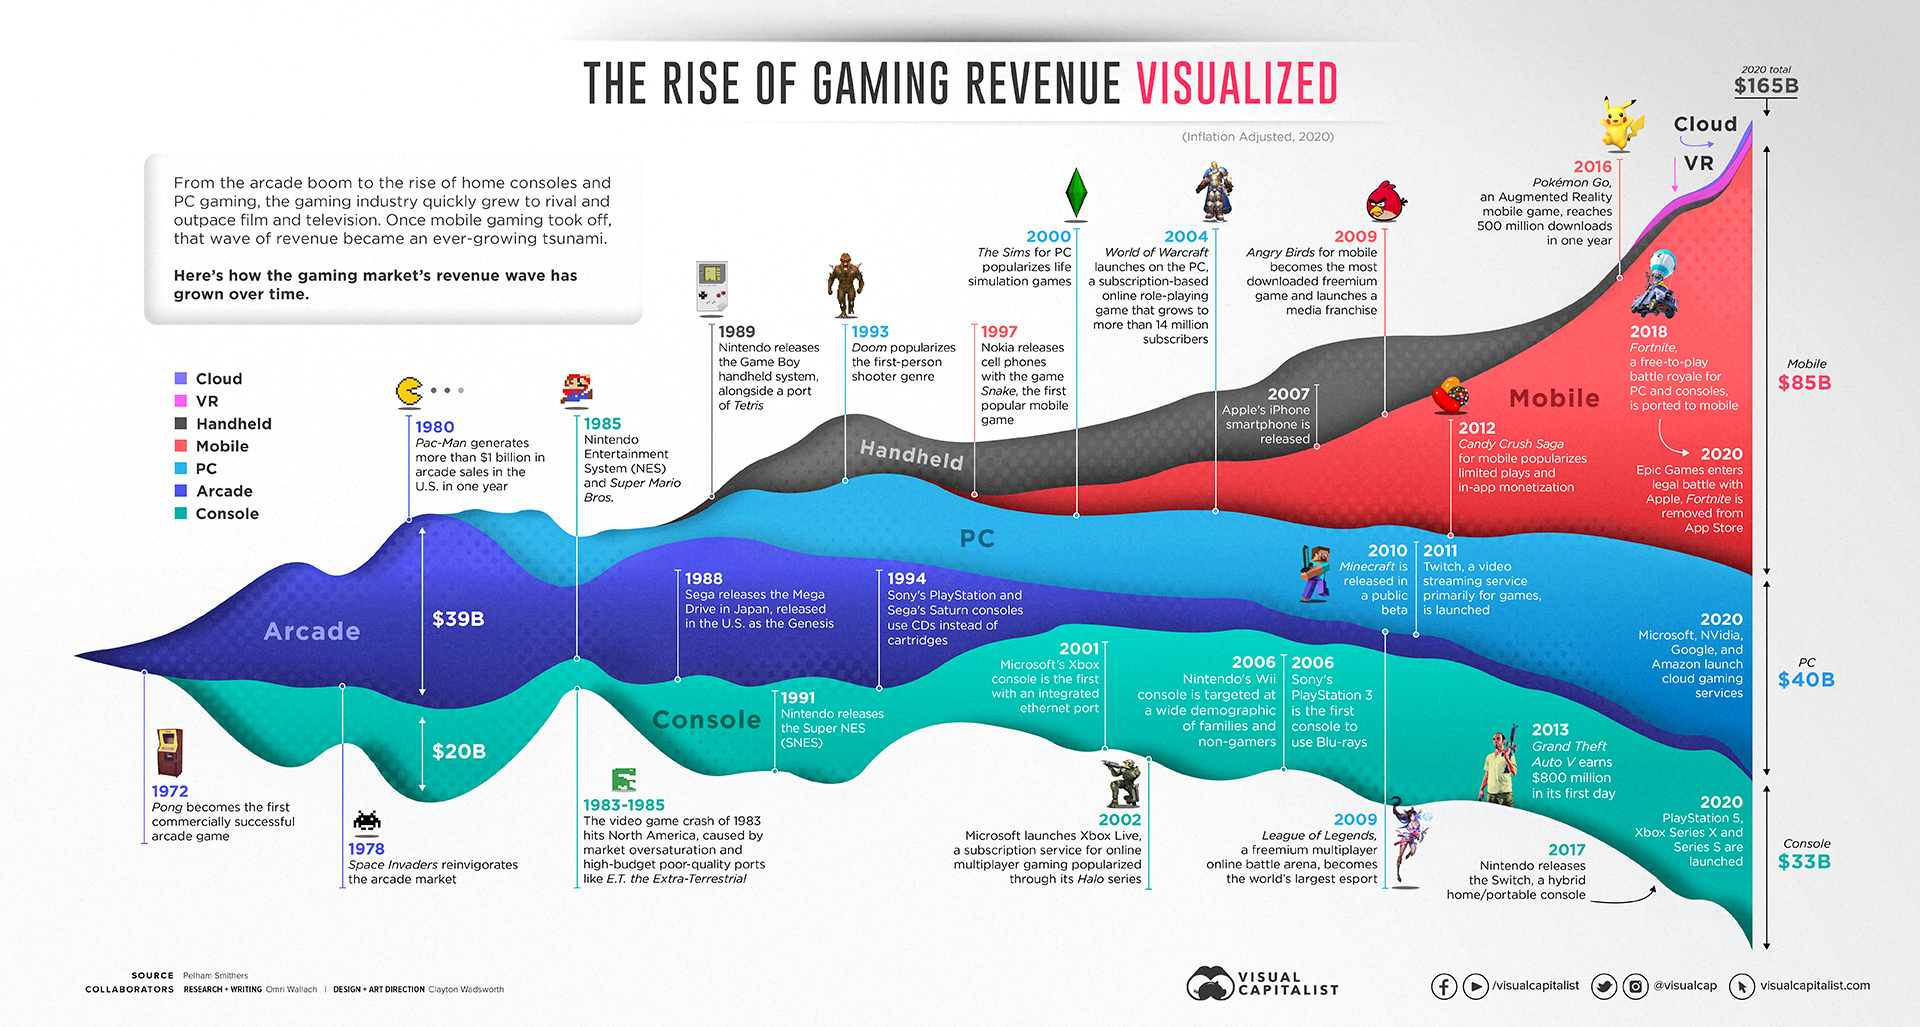

### This dataset contains a list of video games with sales greater than 100,000 copies. It was generated by a scrape of vgchartz.com. It was published on Kaggle by GregorySmith.
##### Fields include
##### •	Rank - Ranking of overall sales
##### •	Name - The games name
##### •	Platform - Platform of the games release (i.e. PC,PS4, etc.)
##### •	Year - Year of the game's release
##### •	Genre - Genre of the game
##### •	Publisher - Publisher of the game
##### •	NA_Sales - Sales in North America (in millions)
##### •	EU_Sales - Sales in Europe (in millions)
##### •	JP_Sales - Sales in Japan (in millions)
##### •	Other_Sales - Sales in the rest of the world (in millions)
##### •	Global_Sales - Total worldwide sales.
##### The script to scrape the data is available at https://github.com/GregorUT/vgchartzScrape.
##### It is based on BeautifulSoup using Python.
##### There are 16,598 records. 2 records were dropped due to incomplete information.

# Objective

#### The objective of this project is to utilize an analysis approach that identifies general patterns in the data. Understanding where outliers occur and how variables are related can help one design statistical analyses that yield meaningful results. The data used in this project contains sales data ranging from the years 1980 to 2016.

# Table of Contents

### A. Library and Dataset
   ##### 1. Importing libraries and dataset.
   ##### 2. Cleaning data.

### B. Frequency Distribution
   ##### 1. By Year
   ##### 2. By Platform
   ##### 3. By Genre
   ##### 4. By Publisher
   ##### 5. Central Trend Measures

### C. Data Exploration
   ##### 1. Best Selling Games
   ##### 2. Sales Per Platform
   ##### 3. Sales by Genre
   ##### 4. Top Publishers

# ________________________________________________________________
# A. Libraries and Dataset
# ________________________________________________________________

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from wordcloud import WordCloud

plt.style.use('fivethirtyeight')

from matplotlib.pyplot import figure
from importlib import reload

plt = reload(plt)

%matplotlib inline

In [3]:
vgs = pd.read_csv('vgsales.csv')

vgs.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


### Dataset Preview

In [4]:
vgs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


#### The dataset is made up of 11 columns, with a maximum of 16,598 rows. 

In [5]:
vgs.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

#### There are a total of 271 records with null values, four of which contain incorrect information. These records make up less than 2% of the data and will be removed. Their removal will not impact the analysis of this project. 

In [19]:
vgs = vgs.dropna() # Drops NaN values.

out = vgs[vgs['Year'] > 2016].index 
vgs.drop(out, inplace = True) # Drops incorrect rows.

vgs.isna().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

#### Given that there are no longer any null values, we can convert the “Year” column from a float64 to an int64 datatype. 

In [16]:
vgs['Year'] = vgs['Year'].astype(int)

vgs.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


## Summary of the Data

In [20]:
vgs.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16287.000000,16287.000000,16287.000000,16287.000000,16287.000000,16287.000000,16287.000000
mean,8288.969853,2006.402775,0.265695,0.147768,0.078849,0.048437,0.541022
std,4792.138597,5.830382,0.822525,0.509360,0.311916,0.190105,1.567520
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4131.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8291.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12437.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2016.000000,41.490000,29.020000,10.220000,10.570000,82.740000


# ________________________________________________________________
# B. Frequency Distribution
# ________________________________________________________________

## Year -> the year that the game was released in. 

In [21]:
year_frq = vgs['Year'].value_counts()

year_frq.head(10)

2009    1431
2008    1428
2010    1257
2007    1201
2011    1136
2006    1008
2005     936
2002     829
2003     775
2004     744
Name: Year, dtype: int64

In [22]:
year_prc = (year_frq/year_frq.sum()) * 100
year_prc.head(10)

2009    8.786148
2008    8.767729
2010    7.717812
2007    7.373979
2011    6.974888
2006    6.188985
2005    5.746915
2002    5.089949
2003    4.758396
2004    4.568060
Name: Year, dtype: float64

In [24]:
year_table = pd.concat({'Frequency': year_frq,
                        'Percent': year_prc},
                         axis = 1)

year_table.head(10)

,Frequency,Percent
2009,1431,8.786148
2008,1428,8.767729
2010,1257,7.717812
2007,1201,7.373979
2011,1136,6.974888
2006,1008,6.188985
2005,936,5.746915
2002,829,5.089949
2003,775,4.758396
2004,744,4.568060


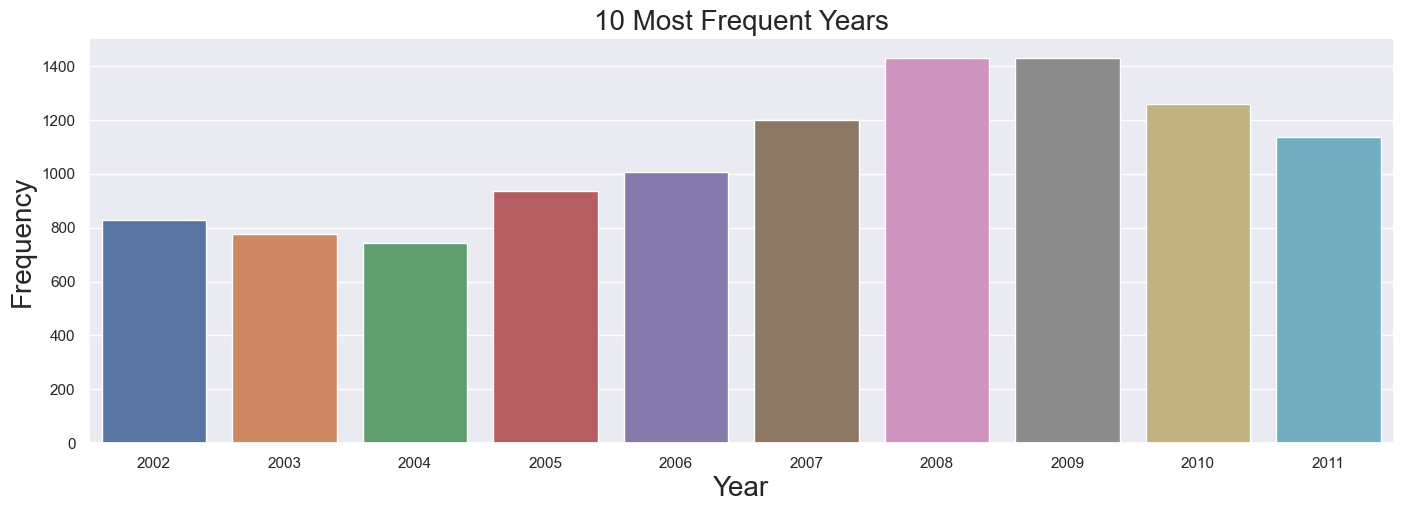

In [31]:
top_year = year_table.nlargest(columns = 'Frequency', n = 10)
top_year

x = top_year.index.astype(int)
y = top_year['Frequency']

sns.barplot(data = year_table, x = x, y = y, palette = 'deep')
plt.xlabel('Year', size = 20)
plt.ylabel('Frequency', size = 20)
plt.title('10 Most Frequent Years', size = 20)
sns.set(rc = {'figure.figsize': (10,5)})

### The years with the most video games released range from 2002 to 2011.

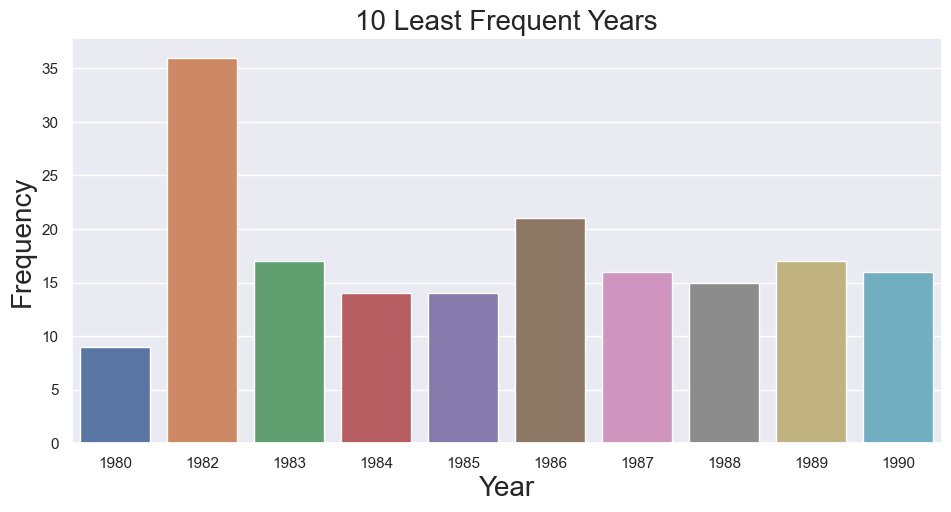

In [32]:
bottom_year = year_table.nsmallest(columns = 'Frequency', n = 10)
bottom_year

x = bottom_year.index.astype(int)
y = bottom_year['Frequency']

sns.barplot(data = year_table, x = x, y = y, palette = 'deep')
plt.xlabel('Year', size = 20)
plt.ylabel('Frequency', size = 20)
plt.title('10 Least Frequent Years', size = 20)
sns.set(rc = {'figure.figsize': (10,5)})

### The years with the least video games released range from 1980 to 1990 (not including 1981).

# ________________________________________________________________

## Platforms -> platform that the games were released on.

In [33]:
platform = vgs.groupby('Platform')

In [34]:
top_platforms = platform.size().sort_values(ascending = False).head(5)
top_platforms

Platform
DS      2130
PS2     2127
PS3     1304
Wii     1290
X360    1234
dtype: int64

### The five platforms with the most games released on are as follows:

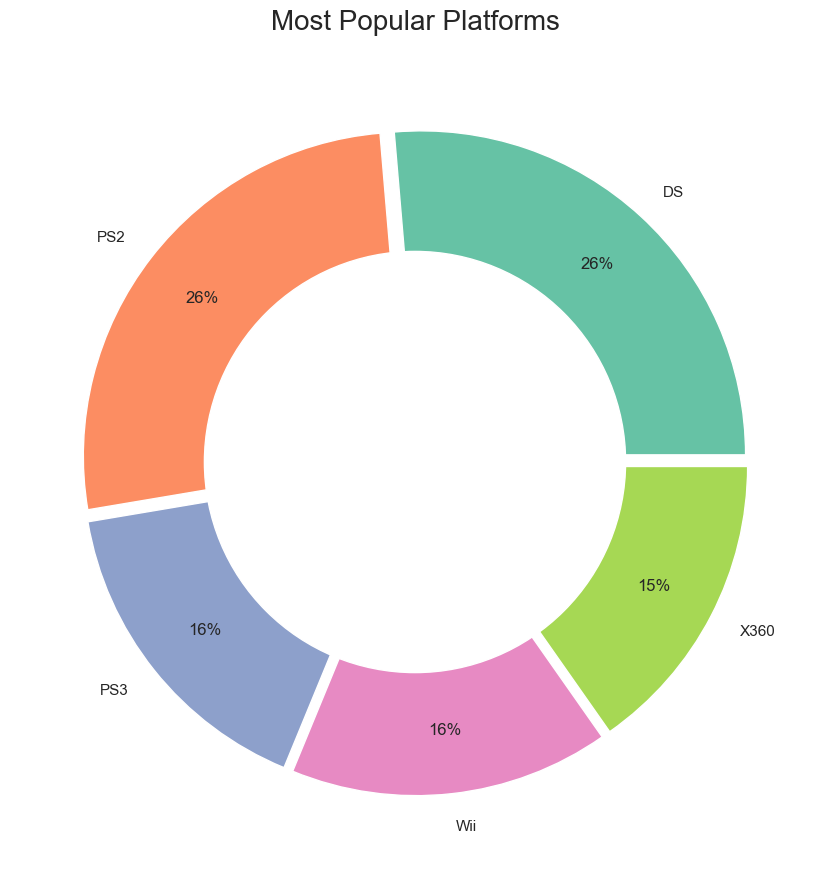

In [38]:
labels = top_platforms.index


plt.pie(top_platforms, 
        labels = labels, 
        autopct='%.0f%%',
        pctdistance = 0.8,
        colors = sns.color_palette('Set2'),
        explode = [0.03, 0.03, 0.03, 0.03, 0.03])

hole = plt.Circle((0, 0), 0.65, facecolor = 'white')
plt.gcf().gca().add_artist(hole)

plt.title(label = 'Most Popular Platforms', 
          fontdict = {'fontsize': 20},
          pad = 20)

sns.set(rc = {'figure.figsize': (15,10)})
plt.show()

# ________________________________________________________________

## Genre -> an informal classification of a video game based on how it is played rather than visual or narrative elements.

In [39]:
genre_frq = vgs['Genre'].value_counts()
genre_prc = (genre_frq/genre_frq.sum()) * 100
genre_table = pd.concat({'Frequency': genre_frq,
                         'Percent': genre_prc},
                          axis = 1)

genre_table

,Frequency,Percent
Action,3250,19.954565
Sports,2304,14.146252
Misc,1686,10.351814
Role-Playing,1468,9.013324
Shooter,1282,7.871308
Adventure,1274,7.822189
Racing,1225,7.521336
Platform,875,5.372383
Simulation,847,5.200467
Fighting,836,5.132928


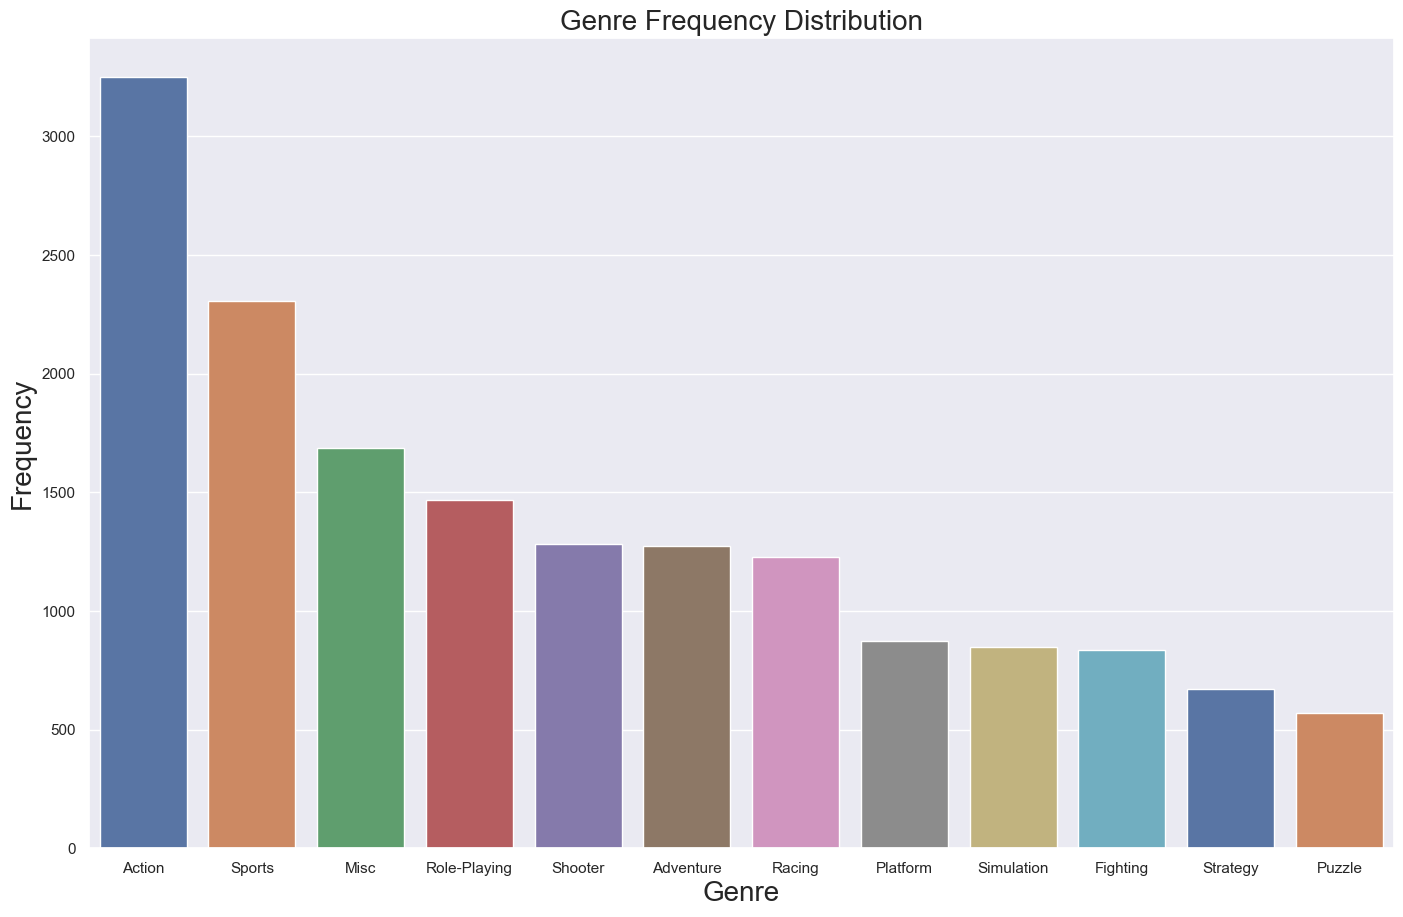

In [41]:
x = genre_table.index
y = genre_table['Frequency']

sns.barplot(data = genre_table, x = x, y = y, palette = 'deep')
plt.xlabel('Genre', size = 20)
plt.ylabel('Frequency', size = 20)
plt.title('Genre Frequency Distribution', size = 20)
sns.set(rc = {'figure.figsize': (10,5)})

### The three most common genre are Action, Sports, and Misc.

# ________________________________________________________________

## Publisher ->  company that publishes video games that have been developed either internally by the publisher or externally by a video game developer.

In [45]:
len(vgs['Publisher'].unique())

576

### There are 576 distinct Publishers in the dataset

In [46]:
publisher_frq = vgs['Publisher'].value_counts()
publisher_prc = (publisher_frq/publisher_frq.sum()) * 100
publisher_table = pd.concat({'Frequency': publisher_frq,
                             'Percent': publisher_prc},
                              axis = 1)

publisher_table = publisher_table.head(10)

### The ten most active Publishers from 1980 to 2016 are as follows:

Text(0.5, 1.0, 'Top Publishers')

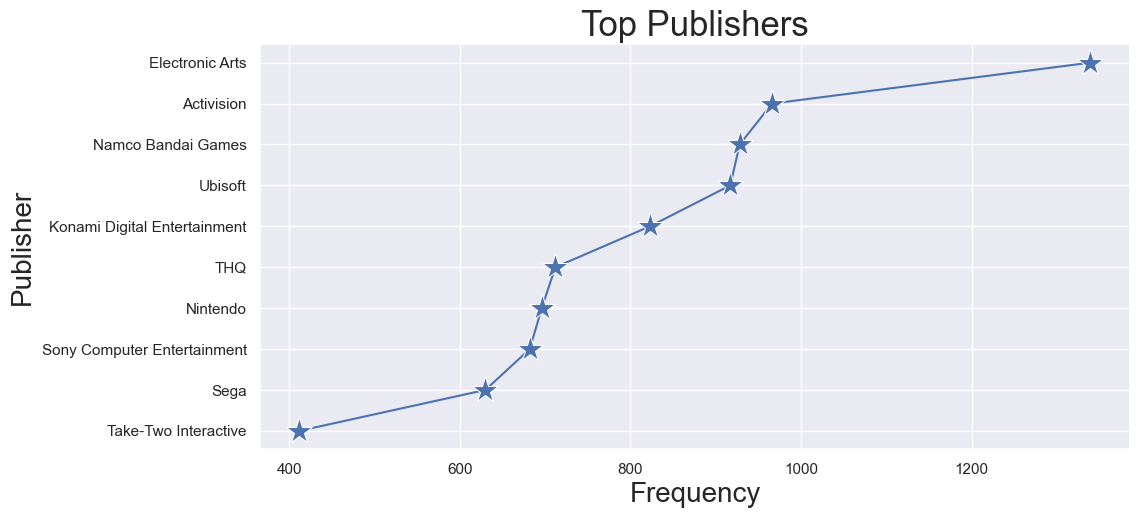

In [47]:
p = sns.lineplot(data = publisher_table,
             x = publisher_table['Frequency'],
             y = publisher_table.index,
             marker = '*',
             markersize = 20)

p.set_xlabel('Frequency', size = 20)
p.set_ylabel('Publisher', size = 20)
p.set_title('Top Publishers', size = 25)

# ________________________________________________________________

## Average, Median, Mode, and Total of Game Sales from 1980 to 2016

In [48]:
avg = vgs[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].mean()
median = vgs[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].median()
mode = vgs[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].mode().iloc[0]
total = vgs[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].sum()

sales = pd.concat({'Avg': avg,
                   'Median': median,
                   'Mode': mode,
                   'Total': total},
                         axis = 1)

sales

,Avg,Median,Mode,Total
NA_Sales,0.265695,0.08,0.00,4327.38
EU_Sales,0.147768,0.02,0.00,2406.69
JP_Sales,0.078849,0.00,0.00,1284.22
Other_Sales,0.048437,0.01,0.00,788.89
Global_Sales,0.541022,0.17,0.02,8811.63


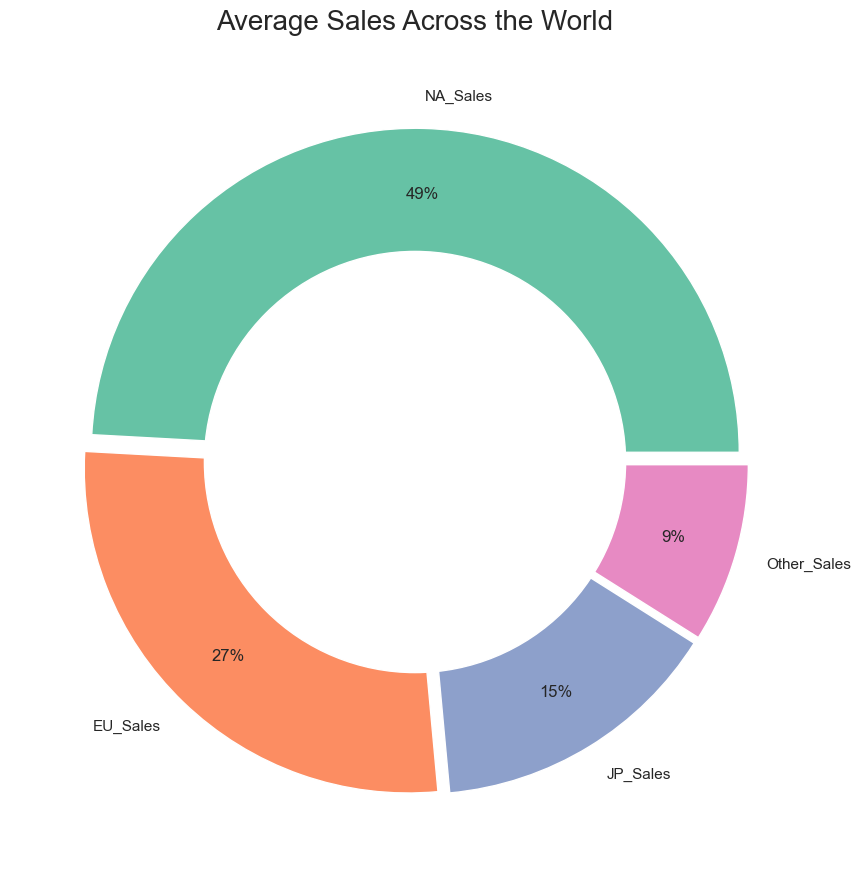

In [51]:
regional_avg = vgs[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].mean()
labels = regional_avg.index


plt.pie(regional_avg, 
        labels = labels, 
        autopct='%.0f%%',
        pctdistance = 0.8,
        colors = sns.color_palette('Set2'),
        explode = [0.03, 0.03, 0.03, 0.03])

hole = plt.Circle((0, 0), 0.65, facecolor = 'white')
plt.gcf().gca().add_artist(hole)

plt.title(label = 'Average Sales Across the World', 
          fontdict = {'fontsize': 20},
          pad = 20)

sns.set(rc = {'figure.figsize': (10,10)})
plt.show()

### Sales in North America far outweigh sales in other regions by nearly twofold. 

# ________________________________________________________________
# C. Exploration
# ________________________________________________________________

### It is important to group game titles by "Name" before performing aggregate functions because most games release on multiple platforms at the same time. Some games are also released on newer platforms at a later date or are brought over to existing platforms that they did not originally launch on.

In [135]:
vgs[vgs['Name'] == 'Grand Theft Auto V']

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16,17,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
23,24,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
44,45,Grand Theft Auto V,PS4,2014,Action,Take-Two Interactive,3.80,5.81,0.36,2.02,11.98
197,198,Grand Theft Auto V,XOne,2014,Action,Take-Two Interactive,2.66,2.01,0.00,0.41,5.08
1896,1898,Grand Theft Auto V,PC,2015,Action,Take-Two Interactive,0.36,0.64,0.00,0.08,1.08


### In this example, we can see that the title "Grand Theft Auto V" first released in 2013 for both Playstation 3 and Xbox 360. It was then re-released on new hardware (Playstation 4 and Xbox One). And finally, it was re-released once more on PC in 2015.

In [54]:
best_na = vgs.groupby('Name').sum(numeric_only = True).sort_values(by = 'NA_Sales', ascending = False).head(10)
best_na['NA_Sales']

Name
Wii Sports                        41.49
Super Mario Bros.                 32.48
Duck Hunt                         26.93
Tetris                            26.17
Grand Theft Auto V                23.46
Call of Duty: Black Ops           17.01
Super Mario World                 15.99
Mario Kart Wii                    15.85
Wii Sports Resort                 15.75
Call of Duty: Modern Warfare 3    15.58
Name: NA_Sales, dtype: float64

In [55]:
best_eu = vgs.groupby('Name').sum(numeric_only = True).sort_values(by = 'EU_Sales', ascending = False).head(10)
best_eu['EU_Sales']

Name
Wii Sports                        29.02
Grand Theft Auto V                23.04
Mario Kart Wii                    12.88
FIFA 15                           12.40
Call of Duty: Modern Warfare 3    11.29
FIFA 16                           11.29
FIFA 14                           11.14
Call of Duty: Black Ops II        11.05
Wii Sports Resort                 11.01
Nintendogs                        11.00
Name: EU_Sales, dtype: float64

In [56]:
best_jp = vgs.groupby('Name').sum(numeric_only = True).sort_values(by = 'JP_Sales', ascending = False).head(10)
best_jp['JP_Sales']

Name
Pokemon Red/Pokemon Blue              10.22
Pokemon Gold/Pokemon Silver            7.20
Super Mario Bros.                      6.96
New Super Mario Bros.                  6.50
Pokemon Diamond/Pokemon Pearl          6.04
Tetris                                 6.03
Pokemon Black/Pokemon White            5.65
Dragon Quest VII: Warriors of Eden     5.40
Pokemon Ruby/Pokemon Sapphire          5.38
Animal Crossing: Wild World            5.33
Name: JP_Sales, dtype: float64

In [57]:
best_o = vgs.groupby('Name').sum(numeric_only = True).sort_values(by = 'Other_Sales', ascending = False).head(10)
best_o['Other_Sales']

Name
Grand Theft Auto: San Andreas     10.72
Wii Sports                         8.46
Grand Theft Auto V                 8.03
Gran Turismo 4                     7.53
Call of Duty: Black Ops II         3.88
FIFA Soccer 08                     3.53
Pro Evolution Soccer 2008          3.51
Call of Duty: Black Ops 3          3.42
Call of Duty: Modern Warfare 3     3.35
Mario Kart Wii                     3.31
Name: Other_Sales, dtype: float64

In [58]:
best_g = vgs.groupby('Name').sum(numeric_only = True).sort_values(by = 'Global_Sales', ascending = False).head(10)
best_g['Global_Sales']

Name
Wii Sports                        82.74
Grand Theft Auto V                55.92
Super Mario Bros.                 45.31
Tetris                            35.84
Mario Kart Wii                    35.82
Wii Sports Resort                 33.00
Pokemon Red/Pokemon Blue          31.37
Call of Duty: Modern Warfare 3    30.83
New Super Mario Bros.             30.01
Call of Duty: Black Ops II        29.72
Name: Global_Sales, dtype: float64

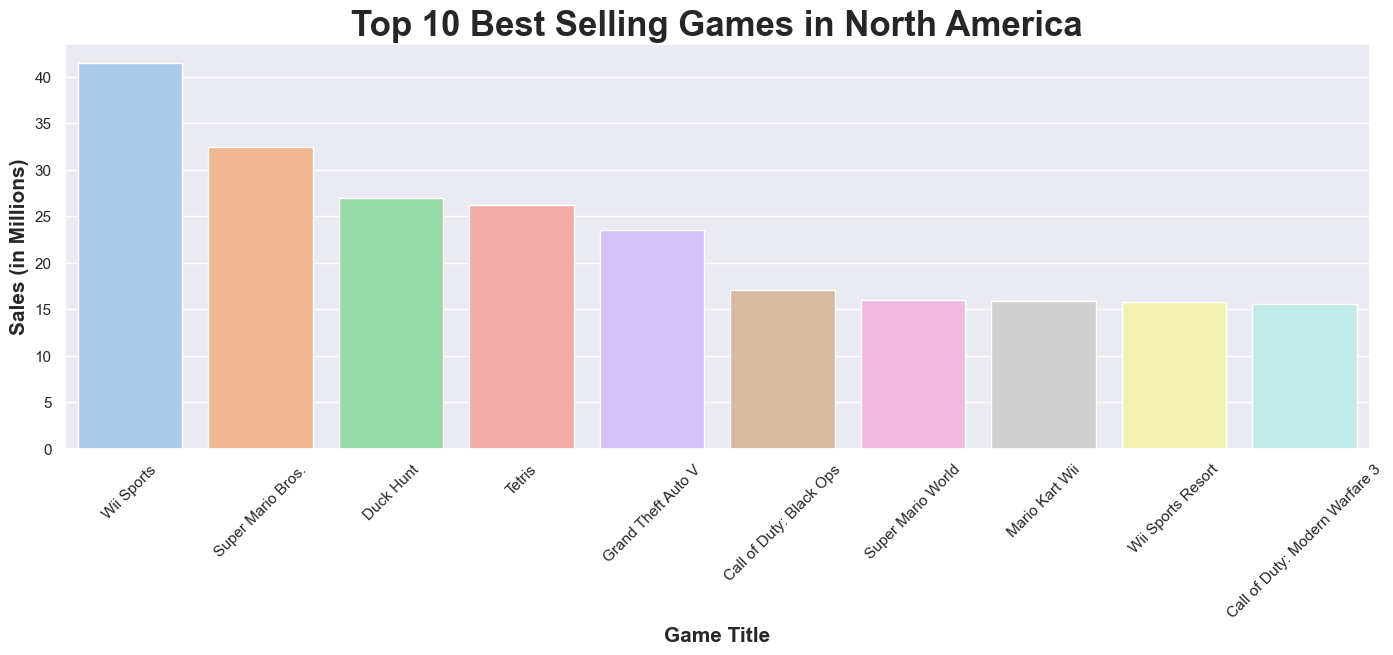

In [79]:
x = best_na.index
y = best_na['NA_Sales']

bsg = sns.barplot(data = best_na, 
                  x = x, 
                  y = y, 
                  palette = 'pastel')
bsg.set_title('Top 10 Best Selling Games in North America', fontdict = {'size': 25, 
                                                                        'weight': 'bold'})
bsg.set_xlabel('Game Title', fontdict = {'size': 15,
                                         'weight': 'bold'})
bsg.set_ylabel('Sales (in Millions)', fontdict = {'size': 15,
                                         'weight': 'bold'})
bsg.tick_params(axis = 'x', rotation = 45)

sns.set(rc = {'figure.figsize': (15,5)})

### Although this dataset does not include descriptive information about the Publishers, it is important to note that further research shows that the top ten best performing games sold in North America are spread evenly between western and eastern developers.

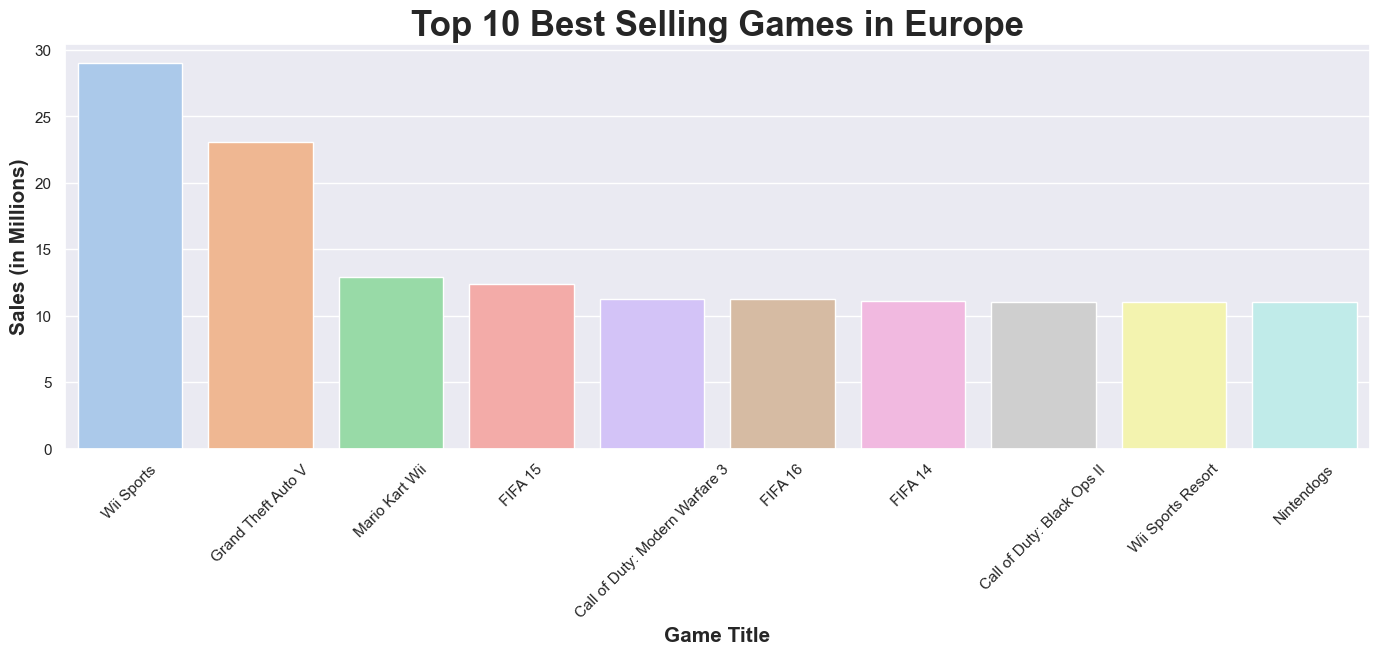

In [78]:
x = best_eu.index
y = best_eu['EU_Sales']

bsg = sns.barplot(data = best_eu, 
                  x = x, 
                  y = y, 
                  palette = 'pastel')
bsg.set_title('Top 10 Best Selling Games in Europe', fontdict = {'size': 25, 
                                                                        'weight': 'bold'})
bsg.set_xlabel('Game Title', fontdict = {'size': 15,
                                         'weight': 'bold'})
bsg.set_ylabel('Sales (in Millions)', fontdict = {'size': 15,
                                         'weight': 'bold'})
bsg.tick_params(axis = 'x', rotation = 45)

sns.set(rc = {'figure.figsize': (15,5)})

### The ten best performing games in Europe are dominated by Sports games, most notably soccer games.

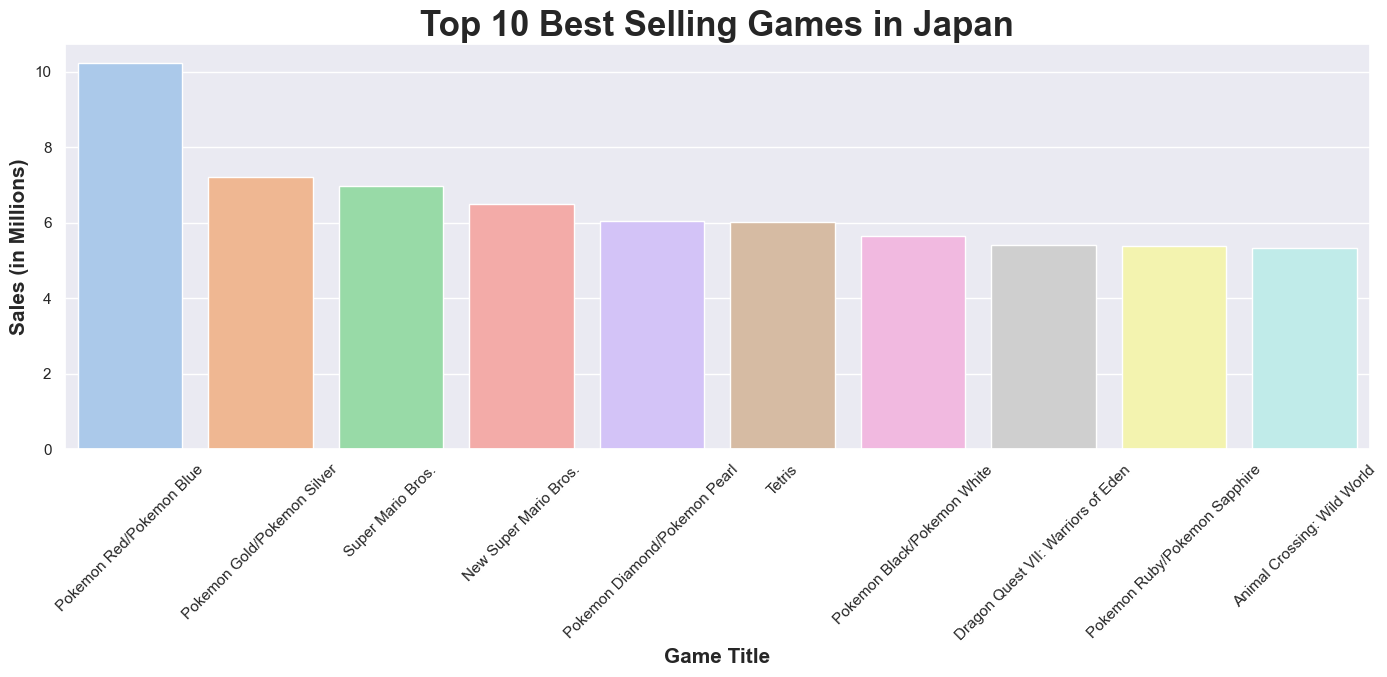

In [77]:
x = best_jp.index
y = best_jp['JP_Sales']

bsg = sns.barplot(data = best_jp, 
                  x = x, 
                  y = y, 
                  palette = 'pastel')
bsg.set_title('Top 10 Best Selling Games in Japan', fontdict = {'size': 25, 
                                                                'weight': 'bold'})
bsg.set_xlabel('Game Title', fontdict = {'size': 15,
                                         'weight': 'bold'})
bsg.set_ylabel('Sales (in Millions)', fontdict = {'size': 15,
                                         'weight': 'bold'})
bsg.tick_params(axis = 'x', rotation = 45)

sns.set(rc = {'figure.figsize': (15,5)})

### The ten most sold games in Japan are both made and published by Japanese developers and publishers. Although Tetris does not originate in Japan, the specific versions made and distributed in this dataset are made by Nintendo, a Japanese company. 

In [73]:
Tetris = vgs['Name'] == 'Tetris'
vgs[Tetris]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
5,6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
155,156,Tetris,NES,1988,Puzzle,Nintendo,2.97,0.69,1.81,0.11,5.58


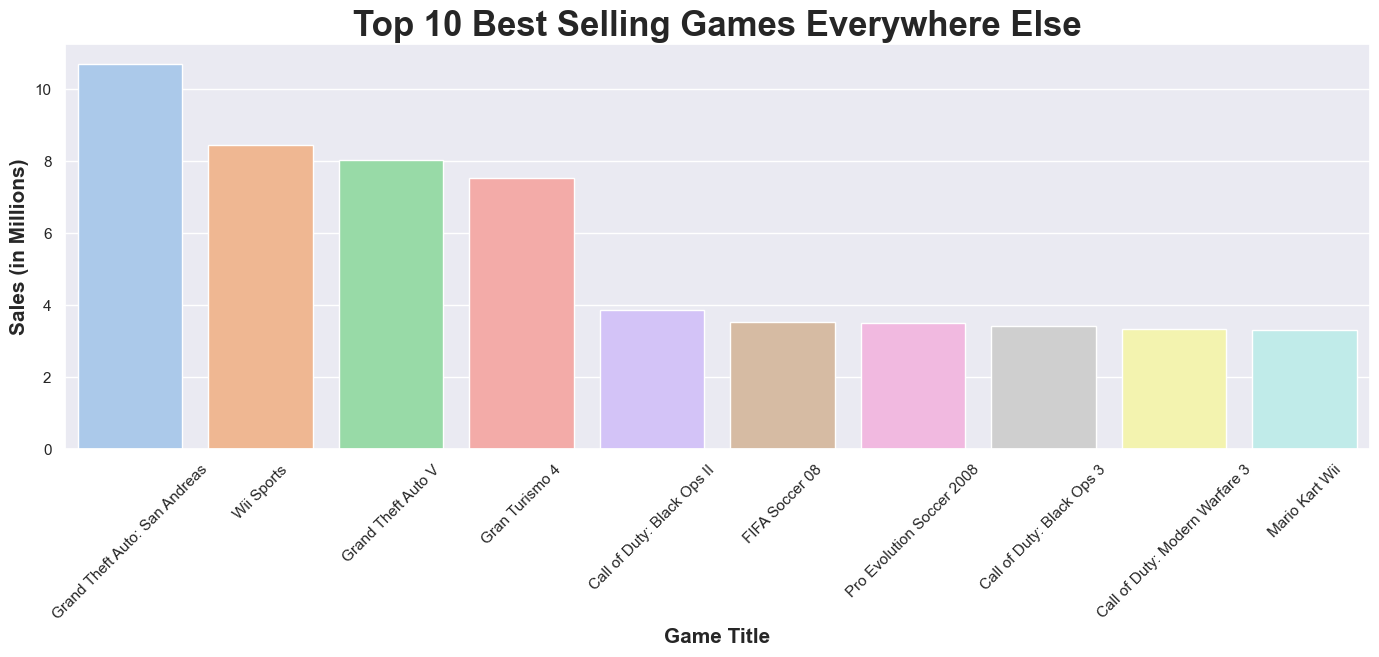

In [133]:
x = best_o.index
y = best_o['Other_Sales']

bsg = sns.barplot(data = best_o, 
                  x = x, 
                  y = y, 
                  palette = 'pastel')
bsg.set_title('Top 10 Best Selling Games Everywhere Else', fontdict = {'size': 25, 
                                                                       'weight': 'bold'})
bsg.set_xlabel('Game Title', fontdict = {'size': 15,
                                         'weight': 'bold'})
bsg.set_ylabel('Sales (in Millions)', fontdict = {'size': 15,
                                         'weight': 'bold'})
bsg.tick_params(axis = 'x', rotation = 45)

sns.set(rc = {'figure.figsize': (15,5)})

### The ten most sold games everywhere else are mostly distributed by western Publishers.

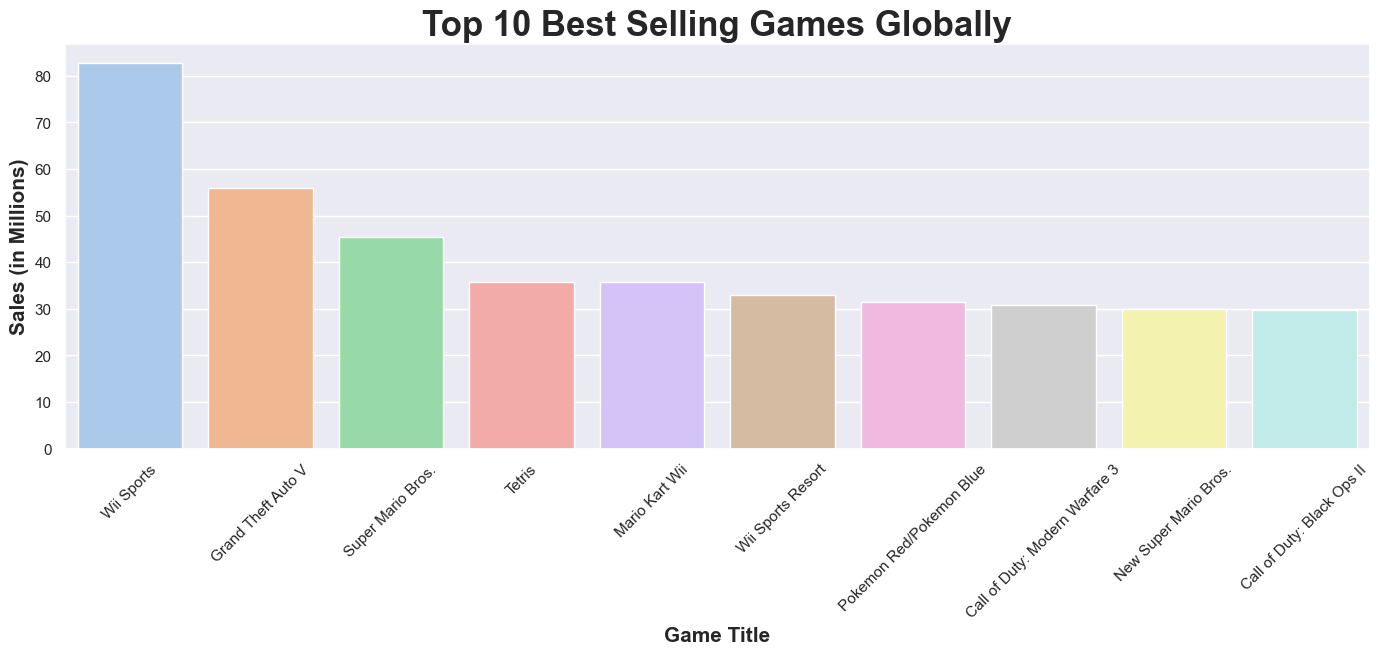

In [80]:
x = best_g.index
y = best_g['Global_Sales']

bsg = sns.barplot(data = best_g, 
                  x = x, 
                  y = y, 
                  palette = 'pastel')
bsg.set_title('Top 10 Best Selling Games Globally', fontdict = {'size': 25, 
                                                                       'weight': 'bold'})
bsg.set_xlabel('Game Title', fontdict = {'size': 15,
                                         'weight': 'bold'})
bsg.set_ylabel('Sales (in Millions)', fontdict = {'size': 15,
                                         'weight': 'bold'})
bsg.tick_params(axis = 'x', rotation = 45)

sns.set(rc = {'figure.figsize': (15,5)})

### The ten most sold games globally are mostly distributed by eastern Publishers.

# ________________________________________________________________

## Number of Sales Per Platform

In [82]:
platform_na = vgs.groupby('Platform')
pna = platform_na['NA_Sales'].sum()
pna.head(15)

Platform
2600     80.78
3DO       0.00
3DS      78.03
DC        5.43
DS      388.26
GB      113.64
GBA     178.43
GC      131.94
GEN      19.27
GG        0.00
N64     138.91
NES     125.94
NG        0.00
PC       92.04
PCFX      0.00
Name: NA_Sales, dtype: float64

In [83]:
platform_eu = vgs.groupby('Platform')
peu = platform_eu['EU_Sales'].sum()
peu.head(15)

Platform
2600      4.86
3DO       0.00
3DS      58.29
DC        1.69
DS      194.05
GB       47.51
GBA      72.49
GC       38.32
GEN       5.52
GG        0.00
N64      41.03
NES      21.15
NG        0.00
PC      137.35
PCFX      0.00
Name: EU_Sales, dtype: float64

In [84]:
platform_jp = vgs.groupby('Platform')
pjp = platform_jp['JP_Sales'].sum()
pjp.head(15)

Platform
2600      0.00
3DO       0.10
3DS      97.30
DC        8.56
DS      175.02
GB       85.12
GBA      46.56
GC       21.34
GEN       2.67
GG        0.04
N64      33.76
NES      98.65
NG        1.44
PC        0.17
PCFX      0.03
Name: JP_Sales, dtype: float64

In [85]:
platform_o = vgs.groupby('Platform')
po = platform_o['Other_Sales'].sum()
po.head(15)

Platform
2600     0.84
3DO      0.00
3DS     12.55
DC       0.27
DS      60.27
GB       8.16
GBA      7.51
GC       5.13
GEN      0.89
GG       0.00
N64      4.31
NES      5.31
NG       0.00
PC      24.33
PCFX     0.00
Name: Other_Sales, dtype: float64

In [86]:
platform_g = vgs.groupby('Platform')
pg = platform_g['Global_Sales'].sum()
pg.head(15)

Platform
2600     86.57
3DO       0.10
3DS     246.27
DC       15.97
DS      818.62
GB      254.42
GBA     305.62
GC      197.14
GEN      28.36
GG        0.04
N64     218.21
NES     251.07
NG        1.44
PC      254.70
PCFX      0.03
Name: Global_Sales, dtype: float64

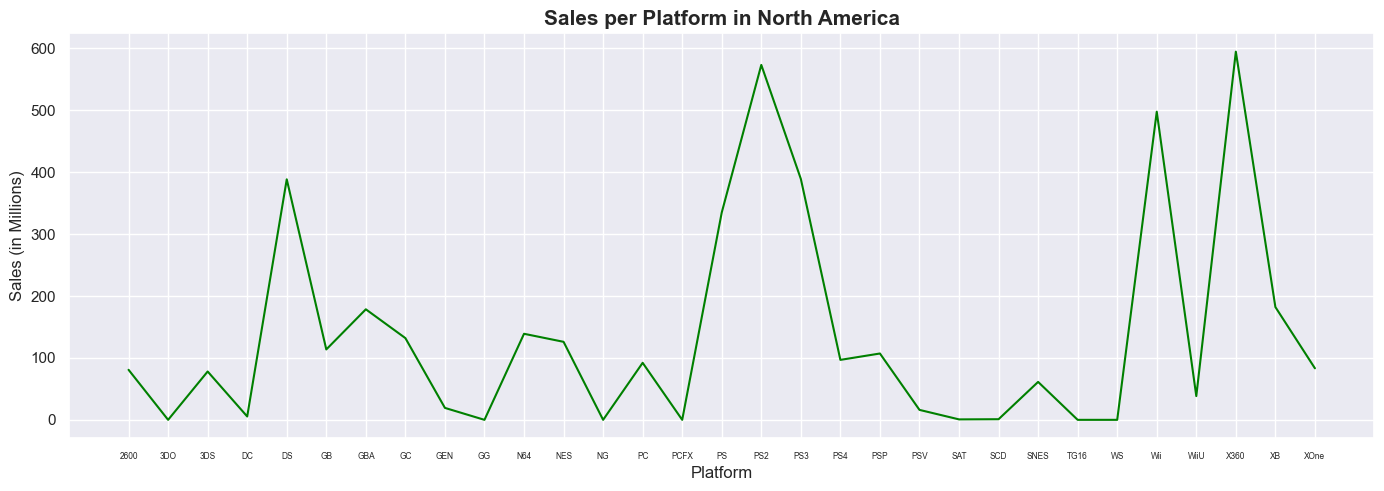

In [87]:
na = sns.lineplot(data = pna, color = 'green')

na.set_title('Sales per Platform in North America', fontdict = {'size': 15, 
                                                                'weight': 'bold'})
na.set_xlabel('Platform')
na.set_ylabel('Sales (in Millions)')
na.tick_params(axis = 'x', which = 'major', labelsize = 6)

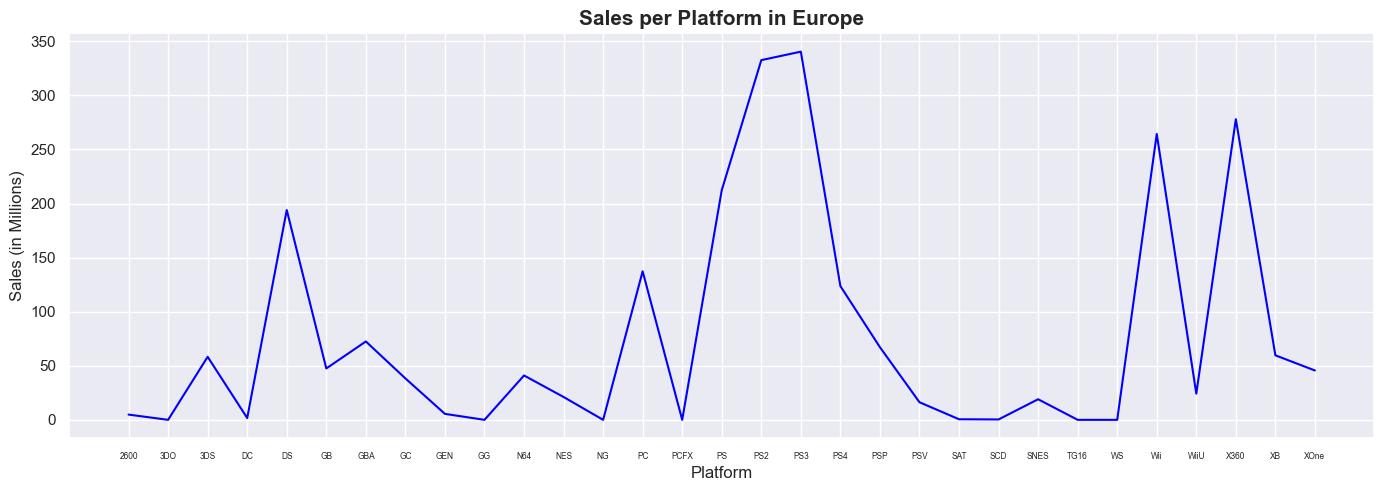

In [88]:
eu = sns.lineplot(data = peu, color = 'blue')

eu.set_title('Sales per Platform in Europe', fontdict = {'size': 15, 
                                                         'weight': 'bold'})
eu.set_xlabel('Platform')
eu.set_ylabel('Sales (in Millions)')
eu.tick_params(axis = 'x', which = 'major', labelsize = 6)

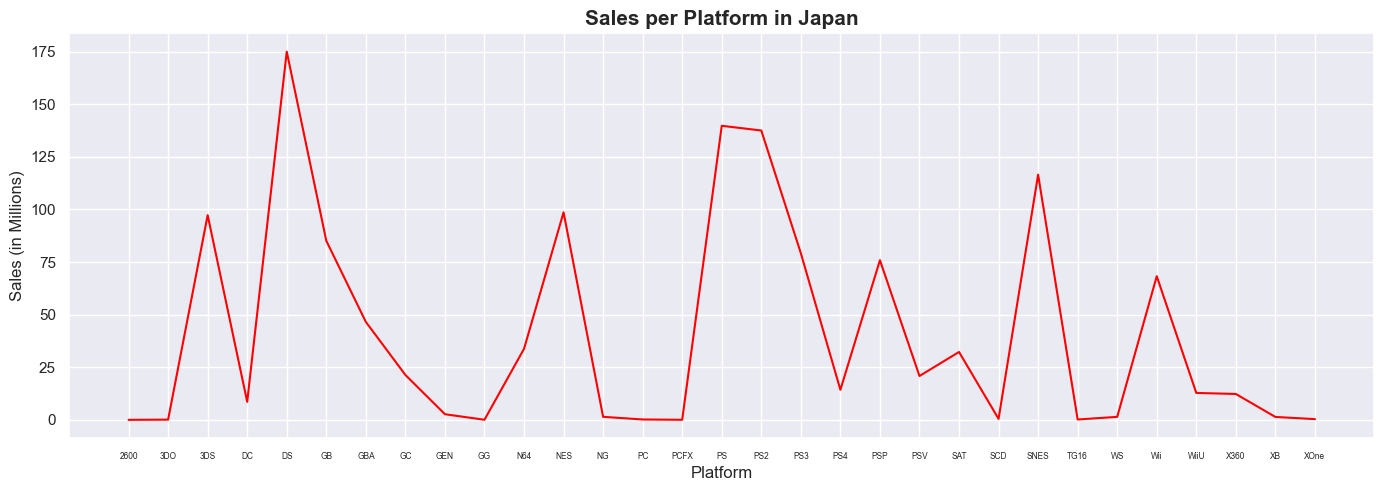

In [89]:
jp = sns.lineplot(data = pjp, color = 'red')

jp.set_title('Sales per Platform in Japan', fontdict = {'size': 15, 
                                                        'weight': 'bold'})
jp.set_xlabel('Platform')
jp.set_ylabel('Sales (in Millions)')
jp.tick_params(axis = 'x', which = 'major', labelsize = 6)

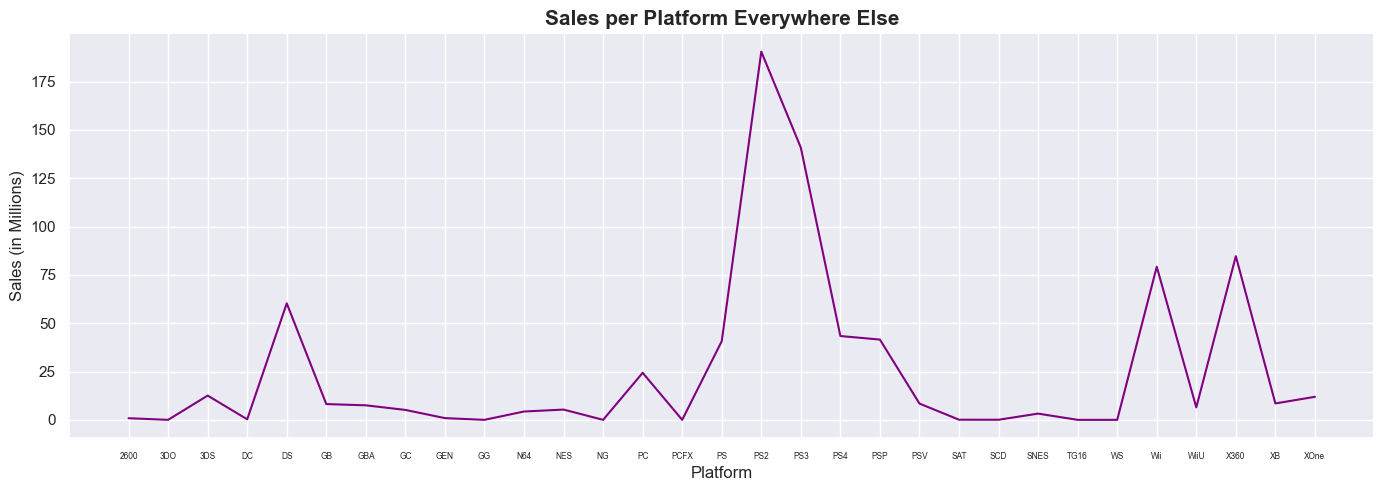

In [90]:
o = sns.lineplot(data = po, color = 'purple')

o.set_title('Sales per Platform Everywhere Else', fontdict = {'size': 15, 
                                                              'weight': 'bold'})
o.set_xlabel('Platform')
o.set_ylabel('Sales (in Millions)')
o.tick_params(axis = 'x', which = 'major', labelsize = 6)

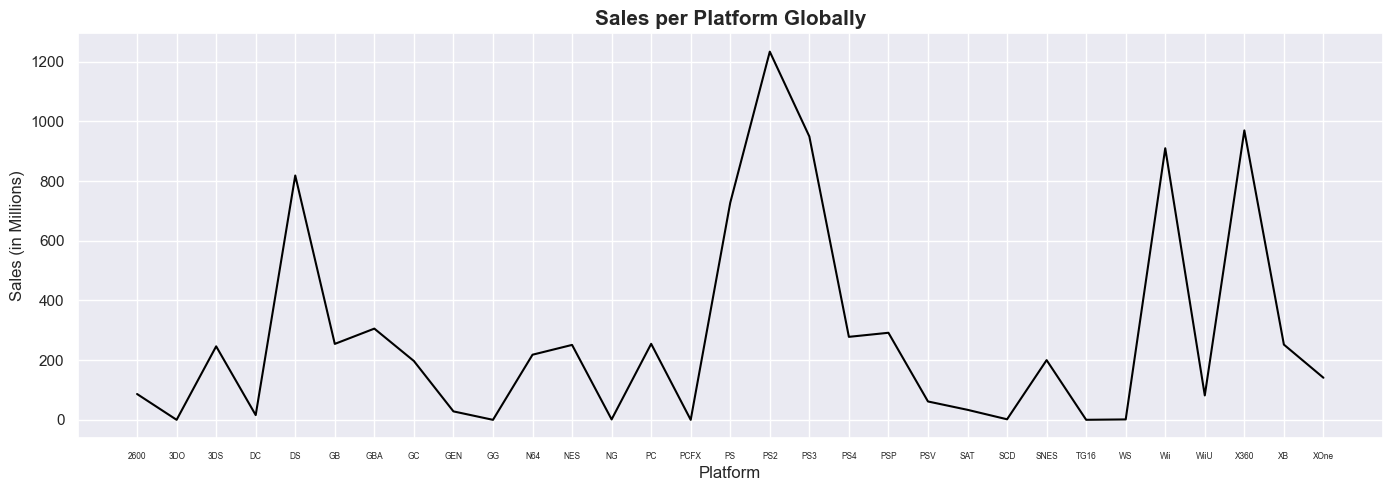

In [91]:
g = sns.lineplot(data = pg, color = 'black')

g.set_title('Sales per Platform Globally', fontdict = {'size': 15, 
                                                         'weight': 'bold'})
g.set_xlabel('Platform')
g.set_ylabel('Sales (in Millions)')
g.tick_params(axis = 'x', which = 'major', labelsize = 6)

### Sales on western platforms (ex. Microsoft - Xbox) were overshadowed by sales on eastern platforms (ex. Nintendo - DS/Wii, Sony - Playstation) in Japan. However, western platforms performed well enough in North America and Europe to rival the sales on eastern platforms globally.

### Although there are very minimal hardware differences between some of these platforms (ex. Xbox One vs. Playstation 4), Sony and Nintendo offer their customers a greater library of "Role-Playing" games. This genre, as we'll see later, is the most popular genre of video games in Japan.

# ________________________________________________________________

## Sales by Genre

In [94]:
genre = vgs.groupby('Genre')
g = genre[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].sum()
g

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Genre,,,,,
Action,861.77,516.48,158.64,184.92,1722.83
Adventure,101.93,63.74,51.99,16.70,234.59
Fighting,220.74,100.00,87.15,36.19,444.05
Misc,396.92,211.77,106.67,73.92,789.87
Platform,445.99,200.65,130.65,51.51,829.13
Puzzle,122.01,50.52,56.68,12.47,242.21
Racing,356.93,236.31,56.61,76.68,726.76
Role-Playing,326.50,187.57,350.25,59.38,923.79
Shooter,575.16,310.45,38.18,101.90,1026.20


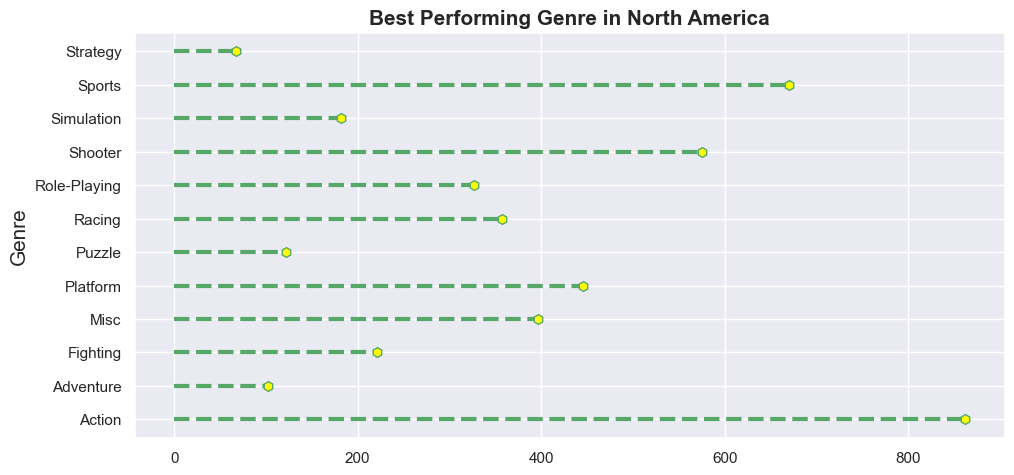

In [109]:
x = g.index
y = g['NA_Sales']

markerline, stemlines, baseline = plt.stem(x, 
                                           y, 
                                           linefmt = 'g--',
                                           markerfmt = 'h',
                                           basefmt = ' ', 
                                           orientation = 'horizontal')
plt.setp(markerline, markersize = 7)
plt.setp(stemlines, 'linewidth', 3)
markerline.set_markerfacecolor('yellow')

plt.title('Best Performing Genre in North America', fontdict = {'size': 15,
                                                                'weight': 'bold'})

plt.ylabel('Genre', size = 15)
sns.set(rc = {'figure.figsize': (5,5)})

### The top three genres in North America are Action, Sports, and Shooter.

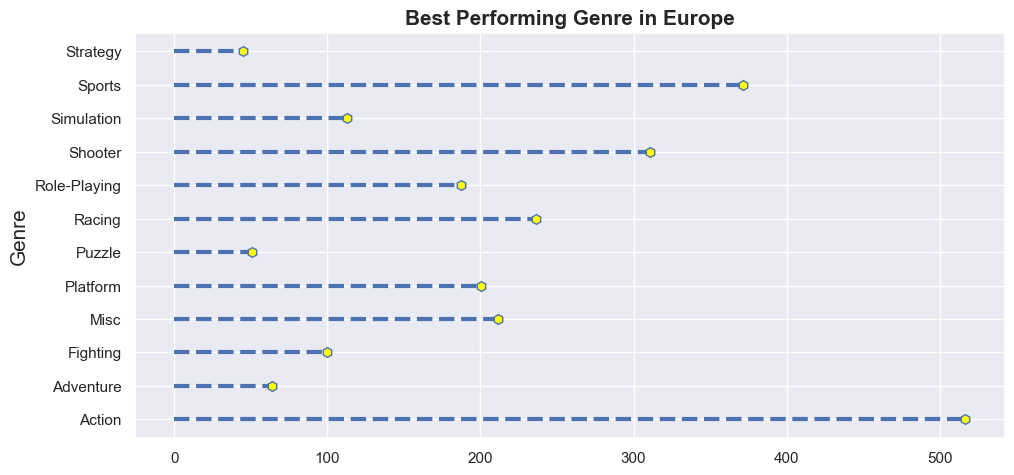

In [115]:
x = g.index
y = g['EU_Sales']

markerline, stemlines, baseline = plt.stem(x, 
                                           y, 
                                           linefmt = 'b--',
                                           markerfmt = 'h',
                                           basefmt = ' ', 
                                           orientation = 'horizontal')
plt.setp(markerline, markersize = 7)
plt.setp(stemlines, 'linewidth', 3)
markerline.set_markerfacecolor('yellow')

plt.title('Best Performing Genre in Europe', fontdict = {'size': 15,
                                                         'weight': 'bold'})

plt.ylabel('Genre', size = 15)
sns.set(rc = {'figure.figsize': (15,5)})

### The top three genres in Europe are Action, Sports, and Shooter.

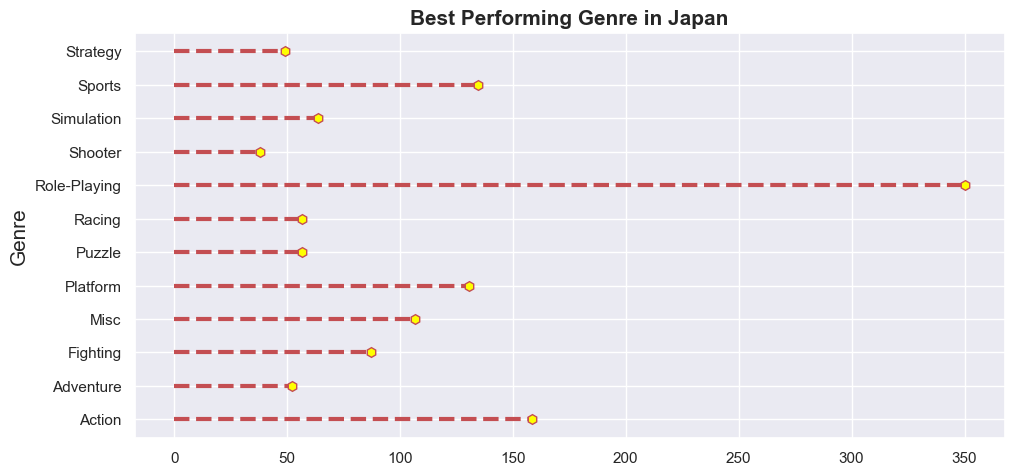

In [120]:
x = g.index
y = g['JP_Sales']

markerline, stemlines, baseline = plt.stem(x, 
                                           y, 
                                           linefmt = 'r--',
                                           markerfmt = 'h',
                                           basefmt = ' ', 
                                           orientation = 'horizontal')
plt.setp(markerline, markersize = 7)
plt.setp(stemlines, 'linewidth', 3)
markerline.set_markerfacecolor('yellow')

plt.title('Best Performing Genre in Japan', fontdict = {'size': 15,
                                                        'weight': 'bold'})

plt.ylabel('Genre', size = 15)
sns.set(rc = {'figure.figsize': (15,5)})

### The top three genres in Japan are Role-Playing, Action, and Sports.

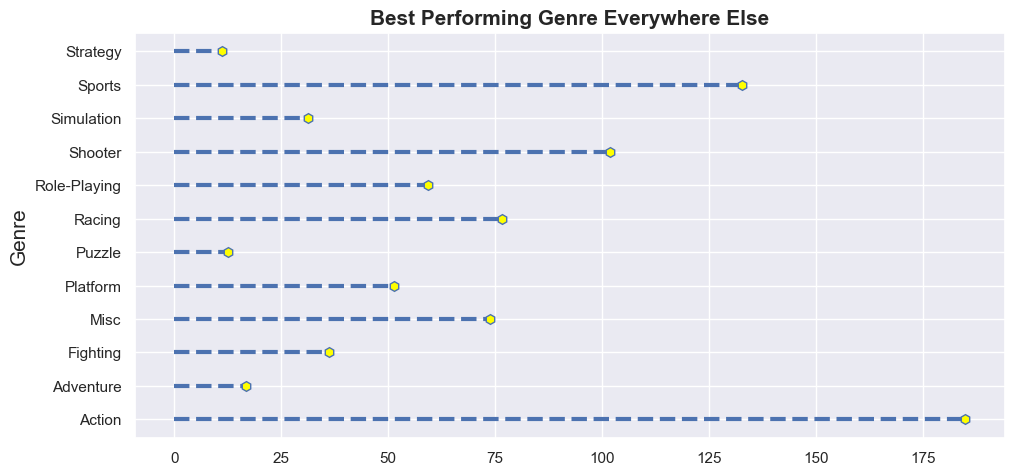

In [122]:
x = g.index
y = g['Other_Sales']

markerline, stemlines, baseline = plt.stem(x, 
                                           y, 
                                           linefmt = 'p--',
                                           markerfmt = 'h',
                                           basefmt = ' ', 
                                           orientation = 'horizontal')
plt.setp(markerline, markersize = 7)
plt.setp(stemlines, 'linewidth', 3)
markerline.set_markerfacecolor('yellow')

plt.title('Best Performing Genre Everywhere Else', fontdict = {'size': 15,
                                                               'weight': 'bold'})

plt.ylabel('Genre', size = 15)
sns.set(rc = {'figure.figsize': (15,5)})

### The top three genres everywhere else are Action, Sports, and Shooter.

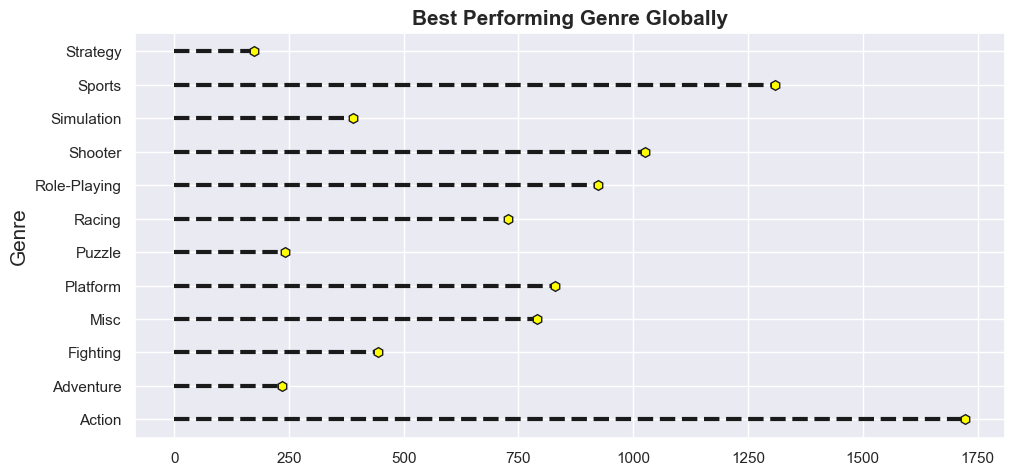

In [124]:
x = g.index
y = g['Global_Sales']

markerline, stemlines, baseline = plt.stem(x, 
                                           y, 
                                           linefmt = 'k--',
                                           markerfmt = 'h',
                                           basefmt = ' ', 
                                           orientation = 'horizontal')
plt.setp(markerline, markersize = 7)
plt.setp(stemlines, 'linewidth', 3)
markerline.set_markerfacecolor('yellow')

plt.title('Best Performing Genre Globally', fontdict = {'size': 15,
                                                        'weight': 'bold'})

plt.ylabel('Genre', size = 15)
sns.set(rc = {'figure.figsize': (15,5)})

### The top three genres globally are Action, Sports, and Shooter.

# ________________________________________________________________

## Top Publishers

In [129]:
top25 = vgs['Publisher'].value_counts().head(25)
top25

Electronic Arts                           1339
Activision                                 966
Namco Bandai Games                         928
Ubisoft                                    917
Konami Digital Entertainment               823
THQ                                        712
Nintendo                                   696
Sony Computer Entertainment                682
Sega                                       630
Take-Two Interactive                       412
Capcom                                     376
Atari                                      347
Tecmo Koei                                 338
Square Enix                                231
Warner Bros. Interactive Entertainment     217
Disney Interactive Studios                 214
Midway Games                               196
Eidos Interactive                          196
505 Games                                  192
Microsoft Game Studios                     189
Acclaim Entertainment                      184
D3Publisher  

In [130]:
top25 = top25.to_dict()
top25

{'Electronic Arts': 1339,
 'Activision': 966,
 'Namco Bandai Games': 928,
 'Ubisoft': 917,
 'Konami Digital Entertainment': 823,
 'THQ': 712,
 'Nintendo': 696,
 'Sony Computer Entertainment': 682,
 'Sega': 630,
 'Take-Two Interactive': 412,
 'Capcom': 376,
 'Atari': 347,
 'Tecmo Koei': 338,
 'Square Enix': 231,
 'Warner Bros. Interactive Entertainment': 217,
 'Disney Interactive Studios': 214,
 'Midway Games': 196,
 'Eidos Interactive': 196,
 '505 Games': 192,
 'Microsoft Game Studios': 189,
 'Acclaim Entertainment': 184,
 'D3Publisher': 183,
 'Vivendi Games': 161,
 'Codemasters': 150,
 'Idea Factory': 127}

(-0.5, 749.5, 499.5, -0.5)

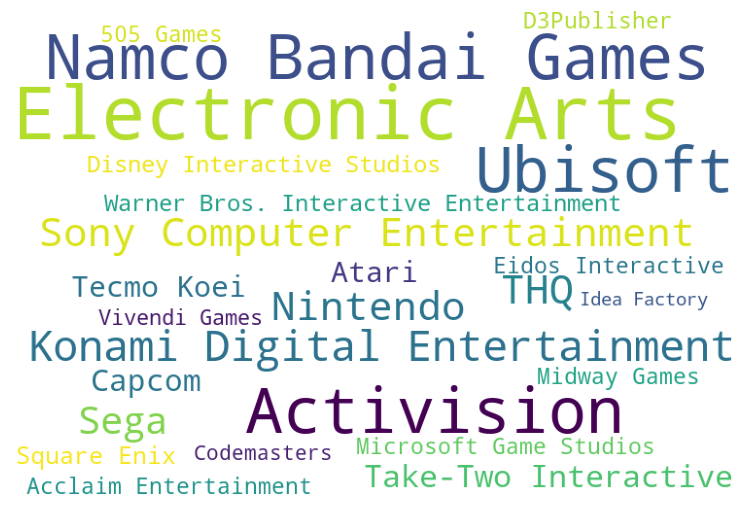

In [131]:
wordcloud = WordCloud(width = 750, 
                      height = 500, 
                    background_color = 'white').generate_from_frequencies(top25)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud)
plt.axis('off')